In [1]:
import heapq
import networkx as nx
import contextlib
import matplotlib.pyplot as plt

def draw_weighted_graph(graph: nx.Graph, graph_dict: dict) -> None:

    for i,j in graph.edges():
        graph[i][j]['weight'] = graph_dict[i][j]

    weight_labels = nx.get_edge_attributes(graph,'weight')
    pos = nx.spring_layout(graph)

    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(graph,pos, with_labels = True)
    with contextlib.redirect_stdout(None):
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=weight_labels, font_size=7)

def dijkstra(graph, start):
    # Priority queue to store (cost, vertex) tuples
    priority_queue = [(0, start)]
    # Dictionary to store the shortest path to each vertex
    shortest_paths = {vertex: float('inf') for vertex in graph}
    # Start vertex has a distance of 0 from itself
    shortest_paths[start] = 0
    # Dictionary to store the previous node on the shortest path
    previous_nodes = {vertex: None for vertex in graph}

    while priority_queue:
        # Get the vertex with the smallest distance
        current_distance, current_vertex = heapq.heappop(priority_queue)

        # If the distance of the current vertex is greater than the recorded shortest path, skip it
        if current_distance > shortest_paths[current_vertex]:
            continue

        # Check the neighbors of the current vertex
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            # If a shorter path to the neighbor is found
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(priority_queue, (distance, neighbor))

    # Reconstruct the shortest path for each vertex
    paths = {}
    for vertex in graph:
        path = []
        current = vertex
        while current is not None:
            path.append(current)
            current = previous_nodes[current]
        path.reverse()
        paths[vertex] = path

    return shortest_paths, paths

In [2]:
class BSTree:
    class Node:
        def __init__(self, val, left=None, right=None):
            self.val = val
            self.left = left
            self.right = right
            
        def rotate_right(self):
            n = self.left
            self.val, n.val = n.val, self.val
            self.left, n.left, self.right, n.right = n.left, n.right, n, self.right
        
        def rotate_left(self):
            n = self.right
            self.val, n.val = n.val, self.val
            #print(self.left,n.left)
            self.right, n.right, self.left, n.left = n.right, n.left, n, self.left
         
        @staticmethod
        def height(n):
            if not n:
                return -1
            else:
                return max(1+BSTree.Node.height(n.left), 1+BSTree.Node.height(n.right))
            
    def __init__(self):
        self.size = 0
        self.root = None
    
    def __contains__(self, val):
        def contains_rec(node):
            if not node:
                return False
            elif val < node.val:
                return contains_rec(node.left)
            elif val > node.val:
                return contains_rec(node.right)
            else:
                return True
        return contains_rec(self.root)
    
    def __len__(self):
        return self.size
        
    def pprint(self, width=64):
        """ (Lijepi) ispis stabla."""
        height = self.height()
        print(height)
        nodes  = [(self.root, 0)]
        prev_level = 0
        repr_str = ''
        while nodes:
            n,level = nodes.pop(0)
            if prev_level != level:
                prev_level = level
                repr_str += '\n'
            if not n:
                if level < height:
                    nodes.extend([(None, level+1), (None, level+1)])
                repr_str += '{val:^{width}}'.format(val='-', width=width//2**level)
            elif n:
                if n.left or level < height:
                    nodes.append((n.left, level+1))
                if n.right or level < height:
                    nodes.append((n.right, level+1))
                repr_str += '{val:^{width}}'.format(val=n.val, width=width//2**level)
        print(repr_str)
    
    def height(self):
        """Visina čvora."""
        def height_rec(t):
            if not t:
                return -1
            else:
                return max(1+height_rec(t.left), 1+height_rec(t.right))
        return height_rec(self.root)
    
    """
    Statička metoda za balansiranje
    """
    @staticmethod
    def rebalance(t):

        """
        Slučajevi 1 ili 3
        Visina lijevog podstabla je veća od visine desnog podstabla 
        """

        if BSTree.Node.height(t.left) > BSTree.Node.height(t.right):

            """
            Slučaj - lijevo-lijevo otežanost ili lijevo-desno otežanost
            """

            if BSTree.Node.height(t.left.left) >= BSTree.Node.height(t.left.right):
                # left-left
                #print('left-left imbalance detected ',  t.val)
                t.rotate_right()

            else:
                # left-right
                #print('left-right imbalance detected ', t.val)
                t.left.rotate_left()
                t.rotate_right()
  
            """
            ZADATAK 1
            Dopuniti potrebni kôd za ovaj slučaj

        Slučajevi 2 ili 4
        Visina desnog podstabla je veća od visine lijevog podstabla 
            """ 
        else:

            """
            Slučaj - desno-desno otežanost ili desno-lijevo otežanost
            """
                   
            if BSTree.Node.height(t.right.right) >= BSTree.Node.height(t.right.left):
                # right-right
                #print('right-right imbalance detected ',  t.val)
                t.rotate_left()
            else:
                # right-left
                #print('right-left imbalance detected ', t.val)
                t.right.rotate_right()
                t.rotate_left()
        
    # Metoda za umetanje u AVL stablo i balansiranje  
    def add(self, val):
        assert(val not in self)
        def add_rec(node):
            if not node:
                return BSTree.Node(val)
            elif val < node.val:
                node.left = add_rec(node.left)
            else:
                node.right = add_rec(node.right)
            """
            Uvjet za balansiranje
            """
            if abs(BSTree.Node.height(node.left) - BSTree.Node.height(node.right)) >= 2:
                BSTree.rebalance(node)
            return node
        self.root = add_rec(self.root)
        self.size += 1
        
        
        """
             ZADATAK 2 - napisati rekurzivne metode u klasi BSTree za obilazak stabla

             Obilasci stabla:
                - inorder   (left-root-right)
                - preorder  (root-left-right)
                - postorder (left-right-root)
        """
        
    def inorder(self, node):
        if node == None:
            return
        self.inorder(node.left)
        print(node.val)
        self.inorder(node.right)
            
    def postorder(self, node):
        if node == None:
            return
        self.postorder(node.left)
        self.postorder(node.right)
        print(node.val)
           
    def preorder(self, node):
        if node == None:
            return
        print(node.val)
        self.preorder(node.left)
        self.preorder(node.right)

"""
Globalne funkcije izvan razreda za ispis minimalne i maksimalne vrijednosti u stablu
"""        
def minValue(node):
    if node.left == None:
        return node.val
    return minValue(node.left)

def maxValue(node):
    if node.right == None:
        return node.val
    return maxValue(node.right)


"""
Globalne funkcije izvan razreda za ispis listova u stablu s lijeva na desno i s desna na lijevo
"""     

def ispisListova_L_R(root):
    
    if root == None:
        return
    
    queue = []

    queue.append(root)

    while len(queue) > 0:

        print(queue[0].val)
        
        node = queue.pop(0)

        if node.left != None:
            queue.append(node.left)

        if node.right != None:
            queue.append(node.right)

               
def ispisListova_R_L(root):
    
    if root == None:
        return
    
    queue = []

    queue.append(root)

    while len(queue) > 0:

        print(queue[0].val)
        
        node = queue.pop(0)

        if node.right != None:
            queue.append(node.right)

        if node.left != None:
            queue.append(node.left)


In [3]:
class DataItem:

	def __init__(self, dd):	#special method to create objects
	#with instances customized to a specific initial state
		self.dData = dd#one piece of data

	def displayItem(self):	#format " /27"
		print ('/', self.dData)
#end class DataItem

class Node:
	#as private instance variables don't exist in Python,
	#hence using a convention: name prefixed with an underscore, to treat them as non-public part
	_ORDER = 4
	def __init__(self):
		self._numItems = 0
		self._pParent = None
		self._childArray = []	#array of nodes
		self._itemArray = []	#array of data
		for j in range(self._ORDER):	#initialize arrays
			self._childArray.append(None)
		for k in range(self._ORDER - 1):
			self._itemArray.append(None)

			#connect child to this node
	def connectChild(self, childNum, pChild):
		self._childArray[childNum] = pChild
		if pChild:
			pChild._pParent = self

			#disconnect child from this node, return it
	def disconnectChild(self, childNum):
		pTempNode = self._childArray[childNum]
		self._childArray[childNum] = None
		return pTempNode

	def getChild(self, childNum):
		return self._childArray[childNum]

	def getParent(self):
		return self._pParent

	def isLeaf(self):
		return not self._childArray[0]

	def getNumItems(self):
		return self._numItems

	def getItem(self, index):	#get DataItem at index
		return self._itemArray[index]

	def isFull(self):
		return self._numItems==self._ORDER - 1

	def findItem(self, key):	#return index of
		for j in range(self._ORDER-1):	#item (within node)
			if not self._itemArray[j]:	#if found,
				break	#otherwise,
			elif self._itemArray[j].dData == key:	#return -1
				return j
		return -1
	#end findItem

	def insertItem(self, pNewItem):
		#assumes node is not full
		self._numItems += 1#will add new item
		newKey = pNewItem.dData	#key of new item

		for j in reversed(range(self._ORDER-1)):	#start on right,	#examine items
			if self._itemArray[j] == None:	#if item null,
				pass	#go left one cell
			else:	#not null,
				itsKey = self._itemArray[j].dData	#get its key
				if newKey < itsKey:	#if it's bigger
					self._itemArray[j+1] = self._itemArray[j]	#shift it right
				else:
					self._itemArray[j+1] = pNewItem	#insert new item
					return j+1#return index to new item
			#end else (not null)
		#end for 	#shifted all items,
		self._itemArray[0] = pNewItem	#insert new item
		return 0
	#end insertItem()

	def removeItem(self):	#remove largest item
		#assumes node not empty
		pTemp = self._itemArray[self._numItems-1]	#save item
		self._itemArray[self._numItems-1] = None	#disconnect it
		self._numItems -= 1#one less item
		return pTemp#return item

	def displayNode(self):	#format "/24/56/74"
		for j in range(self._numItems):
			self._itemArray[j].displayItem()	#format "/56"
		print ('/')	#final "/"

#end class Node

class Tree234:
	#as private instance variables don't exist in Python,
	#hence using a convention: name prefixed with an underscore, to treat them as non-public part
	def __init__(self):
		self._pRoot = Node()	#root node

	def find(self, key):
		pCurNode = self._pRoot	#start at root
		while True:
			childNumber=pCurNode.findItem(key)
			if childNumber != -1:
				return childNumber	#found it
			elif pCurNode.isLeaf():
				return -1#can't find it
			else:	#search deeper
				pCurNode = self.getNextChild(pCurNode, key)
		#end while

	def insert(self, dValue):	#insert a DataItem
		pCurNode = self._pRoot
		pTempItem = DataItem(dValue)

		while True:
			if pCurNode.isFull():	#if node full,
				self.split(pCurNode)	#split it
				pCurNode = pCurNode.getParent()	#back up
					#search once
				pCurNode = self.getNextChild(pCurNode, dValue)
			#end if(node is full)

			elif pCurNode.isLeaf():	#if node is leaf,
				break	#go insert
			#node is not full, not a leaf; so go to lower level
			else:
				pCurNode = self.getNextChild(pCurNode, dValue)
		#end while
		pCurNode.insertItem(pTempItem)	#insert new item
	#end insert()

	def split(self, pThisNode):	#split the node
		#assumes node is full
		
		pItemC = pThisNode.removeItem()	#remove items from
		pItemB = pThisNode.removeItem()	#this node
		pChild2 = pThisNode.disconnectChild(2)	#remove children
		pChild3 = pThisNode.disconnectChild(3)	#from this node

		pNewRight = Node()	#make new node

		if pThisNode == self._pRoot:	#if this is the root,
			self._pRoot = Node()	#make new root
			pParent = self._pRoot	#root is our parent
			self._pRoot.connectChild(0, pThisNode)	#connect to parent
		else:	#this node not the root
			pParent = pThisNode.getParent()	#get parent

		#deal with parent
		itemIndex = pParent.insertItem(pItemB)	#item B to parent
		n = pParent.getNumItems()	#total items?

		j = n-1#move parent's
		while j > itemIndex:	#connections
			pTemp = pParent.disconnectChild(j)	#one child
			pParent.connectChild(j+1, pTemp)	#to the right
			j -= 1
				#connect newRight to parent
		pParent.connectChild(itemIndex+1, pNewRight)

		#deal with newRight
		pNewRight.insertItem(pItemC)	#item C to newRight
		pNewRight.connectChild(0, pChild2)	#connect to 0 and 1
		pNewRight.connectChild(1, pChild3)	#on newRight
	#end split()

	#gets appropriate child of node during search of value
	def getNextChild(self, pNode, theValue):
		#assumes node is not empty, not full, not a leaf
		numItems = pNode.getNumItems()
		
		for j in range(numItems):	#for each item in node
			if theValue < pNode.getItem(j).dData:	#are we less?
				return pNode.getChild(j)	#return left child
		else:	#end for 	#we're greater, so
			return pNode.getChild(j + 1)	#return right child

	def displayTree(self):
		self.recDisplayTree(self._pRoot, 0, 0)

	def recDisplayTree(self, pThisNode, level, childNumber):
		print ('level=', level, 'child=', childNumber)
		pThisNode.displayNode()	#display this node

		#call ourselves for each child of this node
		numItems = pThisNode.getNumItems()
		for j in range(numItems+1):
			pNextNode = pThisNode.getChild(j)
			if pNextNode:
				self.recDisplayTree(pNextNode, level+1, j)
			else:
				return

# AVL stablo

In [4]:
# Kreiranje AVL balansiranog stabla iz liste, iscrtavanje stabla i ispis visine
t = BSTree()
# dodavanje u stablo iz liste
for x in [15, 30, 17,33, 25, 16, 46, 34, 5, 38, 50, 47, 39]:
    t.add(x)

# crtanje stabla
t.pprint()

3
                               34                               
               17                              46               
       15              30              38              50       
   5       16      25      33      -       39      47      -    


In [5]:
import random

a = [26, 2, 77, 75, 39, 78, 85, 34, 30, 25]
print(a)

b = [a[random.randint(0, len(a)-1)] for _ in range(3)]
print(b)

[26, 2, 77, 75, 39, 78, 85, 34, 30, 25]
[78, 78, 78]


# Crveno-crno

In [6]:
a = [26, 2, 77, 75, 39, 78, 85, 34, 30, 25]
print(a)

[26, 2, 77, 75, 39, 78, 85, 34, 30, 25]


# Hash

In [7]:
"""kljucevi = [46, 98, 5, 84, 33, 89, 16, 47, 97, 18, 78, 32, 41, 6, 79, 77, 26, 86, 3, 39, 99, 87, 92]

def h(k: int) -> int:
    return k % 7

velicina_tablice = 7

tablica = {x: [] for x in range(velicina_tablice)}

for k in kljucevi:
    index = h(k)
    tablica[index].append(k)

for pretinac in tablica:
    print(f'Pretinac {pretinac}: {tablica[pretinac]}')

print("\n86 - 3 provjere")
print("39 - 4 provjere")
print("3 - 1 provjera")
print("87 - 2 provjere")"""

'kljucevi = [46, 98, 5, 84, 33, 89, 16, 47, 97, 18, 78, 32, 41, 6, 79, 77, 26, 86, 3, 39, 99, 87, 92]\n\ndef h(k: int) -> int:\n    return k % 7\n\nvelicina_tablice = 7\n\ntablica = {x: [] for x in range(velicina_tablice)}\n\nfor k in kljucevi:\n    index = h(k)\n    tablica[index].append(k)\n\nfor pretinac in tablica:\n    print(f\'Pretinac {pretinac}: {tablica[pretinac]}\')\n\nprint("\n86 - 3 provjere")\nprint("39 - 4 provjere")\nprint("3 - 1 provjera")\nprint("87 - 2 provjere")'

In [8]:
podaci = ['LW293', 'AF721', 'AO434', 'NE073', 'WT433', 'TT315', 'LA599', 'WE969', 'FF595', 'CA346', 'IU407', 'HD179', 'AL439']
podaci = [79, 10, 86, 45, 3, 61, 96, 68, 77, 76, 73]

def h_crta(k: int) -> int:
    return k % 19

def h(k: int, i: int) -> int:
    return (h_crta(k) + i) % 11

def pretvori_tekst_u_broj(tekst: str) -> int:
    zbroj = sum([ord(slovo) for slovo in tekst])
    return zbroj

velicina_tablice = 11
tablica = {x: 0 for x in range(velicina_tablice)}

for p in podaci:

    #k = pretvori_tekst_u_broj(p)

    for i in range(velicina_tablice):
        index = h(p, i)

        if tablica[index] == 0:
            tablica[index] = p
            break

for t in tablica:
    print(f'Pretinac {t}: {tablica[t]}')

print(f"\n'FF595' se nalazi u pretincu 5")
print(f"'WE969' se nalazi u pretincu 4")
print(f"'AL439' se nalazi u pretincu 1")
print(f"'CA346' se nalazi u pretincu 17")
print(f"'IU407' se nalazi u pretincu 18")

Pretinac 0: 86
Pretinac 1: 96
Pretinac 2: 68
Pretinac 3: 79
Pretinac 4: 3
Pretinac 5: 61
Pretinac 6: 77
Pretinac 7: 45
Pretinac 8: 76
Pretinac 9: 73
Pretinac 10: 10

'FF595' se nalazi u pretincu 5
'WE969' se nalazi u pretincu 4
'AL439' se nalazi u pretincu 1
'CA346' se nalazi u pretincu 17
'IU407' se nalazi u pretincu 18


# BTree

In [9]:
pTree = Tree234()
lista = [70, 50, 30, 40, 20, 80, 25, 90, 75, 10]
for l in lista:
	pTree.insert(l)
pTree.displayTree()

level= 0 child= 0
/ 50
/
level= 1 child= 0
/ 30
/
level= 2 child= 0
/ 10
/ 20
/ 25
/
level= 2 child= 1
/ 40
/
level= 1 child= 1
/ 80
/
level= 2 child= 0
/ 70
/ 75
/
level= 2 child= 1
/ 90
/


# Dijsktra

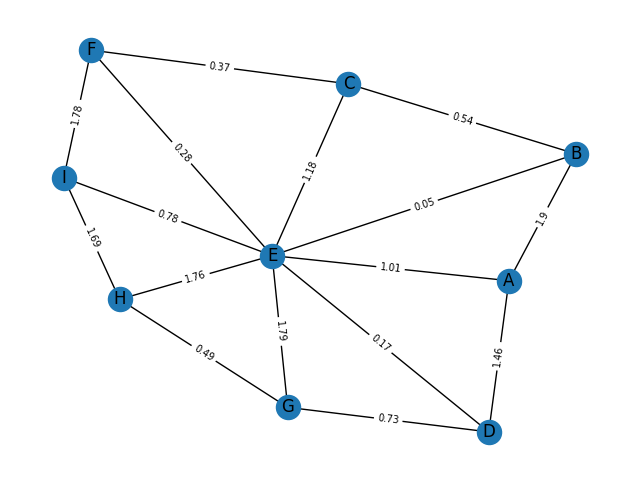

In [10]:
graph = {
    'A': {'B': 1.9, 'D': 1.46, 'E': 1.01},
    'B': {'A': 1.9, 'C': 0.54, 'E': 0.05},
    'C': {'B': 0.54, 'E': 1.18, 'F': 0.37},
    'D': {'A': 1.46, 'E': 0.17, 'G': 0.73},
    'E': {'A': 1.01, 'B': 0.05, 'C': 1.18, 'D': 0.17, 'F': 0.28, 'G': 1.79, 'H': 1.76, 'I': 0.78},
    'F': {'C': 0.37, 'E': 0.28, 'I': 1.78},
    'G': {'D': 0.73, 'E': 1.79, 'H': 0.49},
    'H': {'E': 1.76, 'G': 0.49, 'I': 1.69},
    'I': {'E': 0.78, 'F': 1.78, 'H': 1.69}
}

nx_graph = nx.Graph(graph)
draw_weighted_graph(nx_graph, graph)

In [11]:
a, b = dijkstra(graph, 'A')
print(a)
print(b)

{'A': 0, 'B': 1.06, 'C': 1.6, 'D': 1.18, 'E': 1.01, 'F': 1.29, 'G': 1.91, 'H': 2.4, 'I': 1.79}
{'A': ['A'], 'B': ['A', 'E', 'B'], 'C': ['A', 'E', 'B', 'C'], 'D': ['A', 'E', 'D'], 'E': ['A', 'E'], 'F': ['A', 'E', 'F'], 'G': ['A', 'E', 'D', 'G'], 'H': ['A', 'E', 'D', 'G', 'H'], 'I': ['A', 'E', 'I']}


***

# Teorija - Kolokvij 1

##### 1. Navedite podjelu osnovnih algoritama sortiranja po naravi (iterativni, rekurzivni) i složenosti u O-notaciji.

- iterativni 
    - Bubble sort - najbolji $O(n)$, najgori $O(n^2)$
    - Selection sort - $O(n^2)$ u oba
    - Insertion sort - najbolji $O(n)$, najgori $O(n^2)$

- rekurzivni
    - Merge sort - $O(n \log n)$ u oba
    - Quick sort - najbolji $O(n \log n)$, najgori $O(n^2)$

##### 2. Složenost operacije prespajanja čvorova prilikom rotacija AVL stabla ?
- $O(1)$

##### 4. Ako se crveno-crno stablo sastoji od $n$ čvorova, koja je najveća moguća visina takvog stabla?
- $h \leq 2 \log_2(n + 1)$ => visina je reda $O(\log n)$

##### 6. Koja su temeljna svojstva izražena u pojmu invarijantnosti kod crveno crnog stabla?
- Invarijantnost uređenosti - lijevo manji, desno veći
- Invarijantnost visine - broj crnih čvorova na svakom putu od korijena do svakog lista mora biti jednak
- Invarijantnost boje - dva uzastopna čvora nisu crvena

##### 7. Kakve vrste unutrašnjih čvorova (koji nisu listovi) se razlikuju u 2-3-4 stablu s obzirom na broj pohranjenih podataka i broj čvorova djece?

- Čvor s jednim podatkom ima uvijek dva djeteta
- Čvor s dva podatka ima uvijek tri djeteta
- Čvor s tri podataka ima uvijek četiri djeteta

##### 11. Objasnite temeljne razlike između struktura niza (dinamičkog polja) i povezane liste.

- U nizu su elementi pohranjeni na susjednim memorijskim lokacijama, dok u povezanoj listi nisu.
- U čvoru povezane liste je jedan element vrijednost, a drugi element memorijska lokacija slijedećeg čvora
- Indeksiranje niza je $O(1)$, povezane liste je $O(n)$

***

# Teorija - Kolokvij 2

##### 1. Ako je usmjereni graf zadan listom bridova (M, L), (N, T), (R, T), (S, K), (S, M), (S, R), (U, P), (V, M), (V, Z), (W, J), (W, N) ispisati redoslijed obilaska vrhova prilikom obilaska grafa:

- po širini
- po dubini

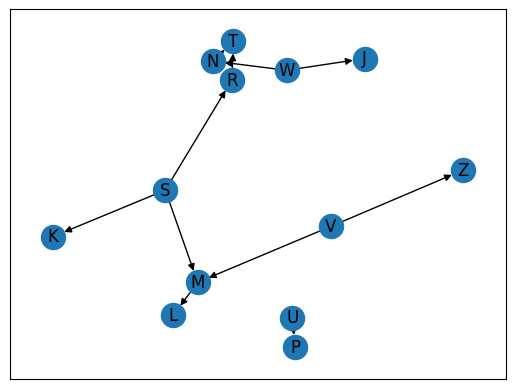

In [12]:
lista = [('M', 'L'), ('N', 'T'), ('R', 'T'), ('S', 'K'), ('S', 'M'), ('S', 'R'), ('U', 'P'), ('V', 'M'), ('V', 'Z'), ('W', 'J'), ('W', 'N')]

graph = nx.DiGraph(lista)
nx.draw_networkx(graph)

##### 2. Potpuni bipartitni graf?

- svaki vrh jednog skupa je spojen na svaki vrh drugog skupa

##### 4. Gustoća neusmjerenog grafa?

- $\frac{2E}{V \cdot (V - 1)}$

##### 5. Osobitosti implementacije B+ stabla?
- Podaci se pospremaju na razini lista
- Listovi su povezani (kao povezana lista) (omogućen slijedni pristup)

##### 6. Razlika i namjena R-stabla u odnosu na B-stabla?

- koriste za pristup prostornim podacima, primjerice za indeksiranje višedimenzionalnih informacija¸
- Podatkovna struktura dijeli prostor s hijerarhijskim ugnježđivanjem i ako je moguće preklapanjem, kao minimalni ograničeni pravokutnik
- Visina je uvijek log n (balansirano po visini)

##### 8. Koja svojstva ima Rabin-Karp algoritam u svrhu optimizacije pretraživanja?

- hash funkcija:
- uzima u obzir poziciju znaka unutar teksta
- koristi „jeftiniju” rehash funkciju

##### 9. Minimax?

***

# Teorija - ostalo

## AVL

- samobalansirajuće binarno stablo pretraživanja

- podstabla svakog čvora razlikuju se u visini najviše za 1

- svako podstablo je AVL stablo

- Otežanost = visina podstabla je za jedan veća od suprotnog podstabla

- Uravnoteženost – visina ~ log n - operacije logn

- Brže pretraživanje u odnosu na obično binarno stablo pretraživanja

## Crveno-crno

- podvrsta uređenog binarnog stabla

- cvor sadrzi informaciju o boji (crven ili crn)

        Svojstva

        1. Svaki čvor je ili crven ili crn.
        2. Korijen je uvijek crn.
        3. Svaki list (stražarski) čvor je crn.
        4. Crveni čvor može imati samo crnu djecu.
        5. Svi putevi od svakog čvora do bilo kojeg čvora lista
        sadrže isti broj crnih čvorova.

- Čvoru koji nema neko od djece pridružuje se stražarski čvor

- visina je 2 log 2 (n+1)

- operacije su O(log n)

- CC stabla su pogodnija (brža) za umetanje i brisanje od AVL, AVL je brzi za pretrazivanje

## Indeksiranje

- proces povezivanja ključa s položajem odgovarajućeg sloga podataka u bazi

- oracle - btree visoki kardinalitet, bitmap niski

- selektivnost = broj jedinstvenih vrijednosti indeksa/ukupan broj zapisa

- B-stablo indeksi su stvoreni kako bi smanjili količinu I/O operacija
potrebnih za pronalaženje i učitavanje skupa podataka.

- Vrlo selektivni indeksi koristi najmanje I/O operacija, a slabo selektivni
indeksi nisu puno bolji od skeniranja tablice.

## Hash funkcije

- Mora biti deterministička – jednaki ključevi moraju proizvesti istu hash vrijednost

- Mora biti učinkovita za računanje

- Mora jednoliko raspodijeliti ključeve

- Faktor opterećenja hash tablice: lambda = broj podataka/veličina tablice

- hashiranje ulancavanjem - elementi koji slete u isti pretinac idu u povezanu listu

- metoda dijeljenja - ostatak dijeljenja ključa k sa m (k mod m)

- metoda mnozenja - floor(m(kA mod 1)) - k * A, uzmi decimalni ostatak, pomnozi s m, zaokruzi

- otvoreno adresiranje - trazimo prazan pretinac ako je h(k, i) zauzet
                       - odmah se posprema u tablicu
                       - linearno (h(k) + i) mod m, kvadratno (h(k) + ci + di^2) mod m, dvostruko (h1(k) + i*h2(k)) mod m

-  ulančavanje brže od ostalih metoda ako je faktor opterećenje hash tablice blizu 1, a otvoreno adresiranje je brže ako je faktor opterećenja manje od ½ (jer traži manji broj skokova)

- hash tablica ima sve O(1)

## Grafovi

- vrhovi (tocke), bridovi (stranice)

- Razapinjajuće stablo (engl. spanning tree) je podgraf koji sadrži sve vrhove grafa unutra jednog stabla i dovoljan broj bridova za spajanje svakog vrha bez ciklusa.

- najveci broj bridova: $\frac{V \cdot (V - 1)}{2}$

- gustoca: $\frac{2E}{V \cdot (V - 1)}$

- stupanj - broj bridova koji ulaze/izlaze iz vrha

- niz/sekvenca stupnjeva - sekvenca stupnjeva vrhova sortirana u padajućem redoslijedu

- Dijametar - duljina najkraćeg puta između najudaljenijih vrhova, najprije se nađu svi najkraći putevi između svakog para vrhova. Najveća duljina od tih puteva je dijametar grafa

- potpuni bipartitni graf - svaki vrh jednog skupa je spojen na svaki vrh drugog skupa

- pohrana grafova - lista (skup) bridova, liste (skupovi) susjedstva, matrica susjedstva

- obilazak po sirini -  Nakon što se obiđu svi vrhovi razine 1, obilaze se svi njihovi sljedbenici na razini 2, koristi se red

- obilizak po dubini - koristi se stog, ide se sto je dublje moguce

- Centralnost stupnja - Vrh koji moguće ima najviše informacija (broj susjeda nekog vrha / najveći mogući broj susjeda tog vrha)

- Centralnost međupoloženosti vrha v je udio najkraćih puteva između svih parova vrhova koji prolaze kroz vrh v

- bliskosti

- svojstvena

- vecina operacija je O(1), edges O(E), incidentEdges O(E)

- Provjera topološke sortiranosti: Ako je matrica susjedstva gornja trokutasta matrica tada je graf topološki sortiran.

- Graf je topološki sortiran ako za svaki par vrhova i,j vrijedi da je i <= j,

## Dijkstra

- za odabrani vrh -> pronalazak najkraćih puteva do svih ostalih vrhova

- Svim vrhovima se razdaljine postave na INF, osim početnog

## B stablo

- Mnogi algoritmi i strukture podataka učinkoviti za manipulaciju u operativnoj memoriji nisu učinkoviti za manipulaciju s velikim podacima u sekundarnoj memoriji.

- B-stablo je učinkovito kada se implementira kao stablo pretraživanja na disku

- B-stablo je uvijek visoko izbalansirano sa svim list-čvorovima na istoj razini

- B-stablo reda m - cvor ima najvise m djece

- svaki čvor osim korijena mora imati najmanje m/2 (zaokruženo na više) djece

- korijen mora imati najmanje dvoje djece

- svi listovi su na istoj razini

- B+ stablo
    - Česta implementacija kao modifikacija B-stabla
    - Podaci se pospremaju na razini lista
    - Listovi su povezani (kao povezana lista)

- 2-3-4 stablo 
    - operacija traženja O(log n)
    - Za razliku od binarnih stabala – nijedan čvor ne može imati samo jedno dijete

- R stablo
    - strukture tipa stabla slične B-stablima, ali se koriste za pristup prostornim podacima (indeksiranje višedimenzionalnih informacija)
    - Podatkovna struktura dijeli prostor s hijerarhijskim ugnježđivanjem i ako je moguće preklapanjem, kao minimalni ograničeni pravokutnik
    - Visina je uvijek log n
    - Svojstva R-stabla: 
        - Svaki čvor sadrži između m i M (uključujuće) zapisa (osim ako je korijen) 
        - Svaki čvor koji nije list sadrži između m i M veza na djecu čvorove (osim ako je korijen) 
        - Korijen ima najmanje dvoje djece (ako nije list) 
        - Svi listovi su na istoj razini.


## Rabin-Karp

- hash funkcija
    - uzima u obzir poziciju znaka unutar teksta
    - koristi „jeftiniju” rehash funkciju
    - ima $d$ velicinu abecede, $h$ množitelj za „najznačajniju” poziciju